In [ ]:
import pandas as pd
import numpy as np

# Math
from scipy import stats
from scipy.stats import norm
from math import exp
from math import sqrt

# Sazonalidade
from statsmodels.tsa.seasonal import seasonal_decompose
#from statsmodels.tsa.seasonal import STL

# Date
from datetime import date

import itertools

import warnings
warnings.filterwarnings('ignore')

# Images
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from pandas.plotting import autocorrelation_plot
import plotly.graph_objects as go

# Split
from sklearn.model_selection import train_test_split 

# Models
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeRegressor 
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
import xgboost as xg

# LSTM e ANN
# import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
# from tensorflow.keras.layers import LSTM


# from keras.models import Sequential
# from keras.layers import Dense

# PREPROCESSING AND METRICS
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics

#import shap

# Pycaret
#import jinja2
#from pycaret.regression import *


# Prophet
#import prophet

#Save model
import pickle
from sklearn import externals

## **Dataset**

In [ ]:
# Para aparecer todas as linhas e colunas do dataset

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [ ]:
dataframe = pd.read_csv('/content/drive/MyDrive/Projetos_ion/ion_productivity_forecast/datas/vendas_forecast.csv', sep=';')
dataframe.head()

,numpedido,numcarga,numnota,condvenda,posicao,dtemissao,vltotal,vltabela,codcli,codvendedor,codfilial,codfilialnf,codplpag,codcob,origem,motorista,codfornecfrete,codfornecfreteredespacho,totpeso,totvolume,pedido_id,chave_nfe,perc_comissao,numpedidotv1,dtemissaonf,tstamp,obs,obs_entrega,perc_lucratividade,numpedorigem,vlfrete,dtabertura,dtfechamento,codsegmento,codtabvenda,codplpagetico,codplpaggenerico,codmotorista,fretedespacho,freteredespacho
0,8802020,227905.0,4589672.0,1,F,2021-09-27 00:00:00,505.730,505.7300,22580,1160,0,0,102,3,F,GEOVANE MATEUS DE ABREU SILVA,NaN,NaN,38.585,129,407a588a-1065-45b2-82e6-ca50afd4262c,NaN,NaN,NaN,2021-09-28 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,8802025,227909.0,4589715.0,1,F,2021-09-27 00:00:00,258.900,258.9000,28802,1160,0,0,102,3,F,NaN,NaN,NaN,6.090,30,a32960a0-3190-4f8d-9c3a-8e900f229380,NaN,NaN,NaN,2021-09-28 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,8802111,NaN,NaN,1,R,2021-09-27 00:00:00,673.187,673.1874,22580,2220,0,0,102,3,F,NaN,NaN,NaN,33.900,27,199eb056-c41e-46bc-b68c-c3d42bd488b4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,8802436,227907.0,4589694.0,1,F,2021-09-27 00:00:00,229.920,229.9200,3020,1160,0,0,7,3,F,NaN,NaN,NaN,0.240,48,8852ee59-d81b-44f2-8699-fc2b9f2140e8,NaN,NaN,NaN,2021-09-28 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,8802438,228162.0,4594076.0,1,F,2021-09-27 00:00:00,555.840,555.8400,17814,1160,0,0,7,3,F,NaN,NaN,NaN,0.120,96,e35e899c-87f8-4fdb-a53c-426b2b6f654a,NaN,NaN,NaN,2021-09-30 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
dataframe.shape

(9110, 40)

In [ ]:
dataframe['dtemissao'] = pd.to_datetime(dataframe['dtemissao'])

In [ ]:
dataframe = dataframe.sort_values(by=['dtemissao'])

In [ ]:
df_2348 = dataframe[dataframe['codvendedor'] == 2348]
df_2348.head()

,numpedido,numcarga,numnota,condvenda,posicao,dtemissao,vltotal,vltabela,codcli,codvendedor,codfilial,codfilialnf,codplpag,codcob,origem,motorista,codfornecfrete,codfornecfreteredespacho,totpeso,totvolume,pedido_id,chave_nfe,perc_comissao,numpedidotv1,dtemissaonf,tstamp,obs,obs_entrega,perc_lucratividade,numpedorigem,vlfrete,dtabertura,dtfechamento,codsegmento,codtabvenda,codplpagetico,codplpaggenerico,codmotorista,fretedespacho,freteredespacho
1100,8903063,230288.0,4632892.0,1,F,2021-11-08,9936.19,9936.19,22580,2348,0,0,102,3,F,NaN,NaN,NaN,214.467,1039,15e526b2-4334-48dd-a73a-621c7dbed8c0,NaN,NaN,NaN,2021-11-09 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1101,8903075,85087.0,NaN,1,M,2021-11-08,14.82,14.82,22580,2348,0,0,102,3,F,MOTORISTA - PADRAO NC 219496,NaN,NaN,0.055,1,15e526b2-4334-48dd-a73a-621c7dbed8c0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1108,8904440,230600.0,NaN,1,M,2021-11-09,1851.11,1851.11,17814,2348,0,0,7,3,F,CARLOS HENRIQUE DA SILVA,NaN,NaN,5.215,103,95681508-0cee-4282-a8c7-a4fd60b78f83,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1107,8904151,230600.0,NaN,1,M,2021-11-09,192.90,192.90,17814,2348,0,0,7,3,F,CARLOS HENRIQUE DA SILVA,NaN,NaN,0.250,10,dd0a74f3-e438-416d-a845-92ed88aa47a8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1151,8911377,NaN,NaN,1,R,2021-11-10,8061.93,8061.93,28802,2348,0,0,102,3,F,NaN,NaN,NaN,116.118,837,440cff42-cd40-4203-a0a5-72a04d89c551,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_2348.shape

(1674, 40)

In [ ]:
df = df_2348.groupby(df_2348['dtemissao']).sum()
df.shape

(129, 33)

In [ ]:
# Criando janela de tempo 1 dia anterior

window = -1
history = [df['vltotal'].values[i] for i in range(window)]
test = [df['vltotal'].values[i] for i in range(window, len(df['vltotal'].values))]

In [ ]:
len(test)

130

In [ ]:
test.pop(129)

439.94

In [ ]:
len(test)

129

In [ ]:
df['test'] = test
df.head()

,numpedido,numcarga,numnota,condvenda,vltotal,vltabela,codcli,codvendedor,codfilial,codfilialnf,codplpag,codcob,codfornecfrete,codfornecfreteredespacho,totpeso,totvolume,perc_comissao,numpedidotv1,tstamp,obs,obs_entrega,perc_lucratividade,numpedorigem,vlfrete,dtabertura,dtfechamento,codsegmento,codtabvenda,codplpagetico,codplpaggenerico,codmotorista,fretedespacho,freteredespacho,test
dtemissao,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-11-08,17806138,315375.0,4632892.0,2,9951.01,9951.01,45160,4696,0,0,204,6,0.0,0.0,214.522,1040,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,439.94
2021-11-09,17808591,461200.0,0.0,2,2044.01,2044.01,35628,4696,0,0,14,6,0.0,0.0,5.465,113,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9951.01
2021-11-10,8911377,0.0,0.0,1,8061.93,8061.93,28802,2348,0,0,102,3,0.0,0.0,116.118,837,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2044.01
2021-11-11,98040842,2306114.0,46391181.0,11,5976.70,5976.70,93603,25828,0,0,76,33,0.0,0.0,118.068,610,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8061.93
2021-11-12,17831994,461266.0,9278817.0,2,14547.54,14547.54,57604,4696,0,0,204,6,0.0,0.0,228.030,1626,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5976.70


In [ ]:
X = df[['vltotal', 'totvolume', 'condvenda']]
y = df['test']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, shuffle=False, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((96, 3), (33, 3), (96,), (33,))

In [ ]:
xgb_r = xg.XGBRegressor(objective ='reg:linear',
                  n_estimators = 10, seed = 123)
xgb_r.fit(X_train, y_train)

y_pred = xgb_r.predict(X_test)

print(f'MAE: {metrics.mean_absolute_error(y_test, y_pred):.2f}')
print(f'MSE: {metrics.mean_squared_error(y_test, y_pred):.2f}')
print(f'RMSE: {np.sqrt(metrics.mean_squared_error(y_test, y_pred)):.2f}')
print(f'R: {metrics.r2_score(y_test, y_pred):.2f}')
MAPE = np.mean(100 * (np.abs(y_test-y_pred)/y_test))
acc = 100 - MAPE
print(f'MAPE: {MAPE:.2f}')
print(f'Acurácia: {acc:.2f}')
print(f'mean y_test: {y_test.mean():.2f}')
print(f'median y_test: {y_test.median():.2f}')
print(f'mean pred: {y_pred.mean():.2f}')
print(f'median pred: {np.median(y_pred):.2f}')

[17:39:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
MAE: 31005.56
MSE: 2512494050.75
RMSE: 50124.78
R: 0.15
MAPE: 888.50
Acurácia: -788.50
mean y_test: 44545.61
median y_test: 24504.65
mean pred: 29718.55
median pred: 20926.52


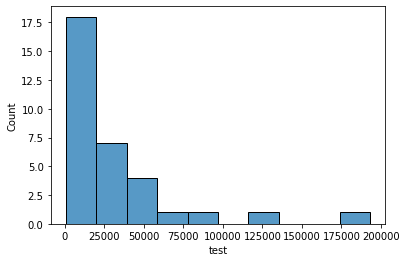

In [ ]:
absolute_error = abs(y_test - y_pred)

sns.histplot(absolute_error, bins=10)

In [ ]:
Test_Data=X_test
 
TestingData=pd.DataFrame(data=Test_Data)
TestingData['valor real']=y_test
TestingData['valor predito']=y_pred
TestingData.head()

,vltotal,totvolume,condvenda,valor real,valor predito
dtemissao,,,,,
2022-06-13,15327.830,1323,2,27504.458,9708.063477
2022-06-14,493.933,151,1,15327.830,19762.574219
2022-06-15,18396.396,1516,5,493.933,29852.460938
2022-06-16,261672.826,22405,56,18396.396,55411.789062
2022-06-17,97253.969,8492,37,261672.826,68473.710938


In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(y=TestingData['valor real'],
                    mode='lines',
                    name='real'))
fig.add_trace(go.Scatter(y=TestingData['valor predito'],
                    mode='lines',
                    name='predito'))

fig.show()

In [ ]:
model_foward = pickle.dumps(xgb_r)

In [ ]:
xgb_foward = pickle.loads(model_foward)

[17:39:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
xgb_r.save_model("/content/drive/MyDrive/Projetos_ion/ion_productivity_forecast/datas/model_xgboost.jon")

In [ ]:
model2 = xg.XGBRegressor()
model2.load_model("model_xgboost.json")

##### Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold

In [ ]:
# define model
model = xg.XGBRegressor(objective ='reg:linear',
                  n_estimators = 10, seed = 123)
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force scores to be positive
scores = np.absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (scores.mean(), scores.std()) )

Mean MAE: 31729.200 (11972.432)


##### Tunning

In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

In [ ]:
X = df[['vltotal', 'totvolume', 'condvenda']]
y = df['test']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, shuffle=False, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((96, 3), (33, 3), (96,), (33,))

In [ ]:
'sampling_method' : ['subsamble', 'uniform', 'gradient_based']
'disable_default_eval_metric':[1]
'tree_method':['exact']

early_stopping_rounds=100

In [ ]:
xgb1 = XGBRegressor()
parameters = {
              'objective':['reg:linear'],
              'learning_rate': [.00001, .0001, 0.001, .01],
              'max_depth': list(range(3, 20)),
              'min_child_weight': list(range(3, 20)),
              'subsample': [0.1,0.5,1.0],
              'colsample_bytree': [0.1, 0.5, 1.0],
              'n_estimators': list(range(10, 200)),
              'eval_metric' : ['mae'],
              'seed': [123],
              'n_estimators': list(range(5, 50)),

              }

xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        cv = 10,
                        n_jobs = -1,
                        verbose=0)

xgb_grid.fit(X_train, y_train)

xgb_cv = (xgb_grid.best_estimator_)

eval_set = [(X_train, y_train),
            (X_test, y_test)]

fit_model = xgb_cv.fit(X_train,y_train)

pred = fit_model.predict(X_test)

print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))
print('R:', metrics.r2_score(y_test, pred))
MAPE = np.mean(100 * (np.abs(y_test-pred)/y_test))
acc = 100 - MAPE
print(f'MAPE: {MAPE:.2f}')
print(f'Acurácia: {acc:.2f}')
print(f'mean y_test: {y_test.mean():.2f}')
print(f'median y_test: {y_test.median():.2f}')
print(f'mean pred: {pred.mean():.2f}')
print(f'median pred: {np.median(pred):.2f}')

In [ ]:
print("Tuned hyperparameters:(best parameters) ",xgb_grid.best_params_)
print("Score: ",xgb_grid.best_score_)

Tuned hyperparameters:(best parameters)  {'colsample_bytree': 1.0, 'eval_metric': 'mae', 'learning_rate': 0.01, 'max_depth': 3, 'min_child_weight': 3, 'n_estimators': 30, 'objective': 'reg:linear', 'seed': 123, 'subsample': 1.0}
Score:  -0.30459503013192657


In [ ]:
y_test.shape

(33,)

In [ ]:
pred.shape

(33,)

In [ ]:
X_test.shape

(33, 3)

In [ ]:
Test_Data=X_test
 
TestingData=pd.DataFrame(data=X_test)
TestingData['valor real']=y_test
TestingData['valor predito']=pred
TestingData.head()

,vltotal,totvolume,condvenda,valor real,valor predito
dtemissao,,,,,
2022-06-13,15327.830,1323,2,27504.458,2966.288086
2022-06-14,493.933,151,1,15327.830,7822.272949
2022-06-15,18396.396,1516,5,493.933,9690.955078
2022-06-16,261672.826,22405,56,18396.396,11098.047852
2022-06-17,97253.969,8492,37,261672.826,34923.921875


In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(y=TestingData['valor real'],
                    mode='lines',
                    name='real'))
fig.add_trace(go.Scatter(y=TestingData['valor predito'],
                    mode='lines',
                    name='predito'))

fig.show()

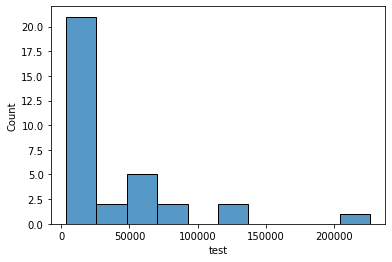

In [ ]:
absolute_error = abs(y_test - pred)

sns.histplot(absolute_error, bins=10)

In [ ]:
xgb_cv

XGBRegressor(colsample_bytree=0.1, eval_metric='rmse', learning_rate=0.01,
             max_depth=5, min_child_weight=3, n_estimators=30,
             objective='reg:squarederror', seed=123, subsample=1.0)

In [ ]:
xgb_cv

XGBRegressor(colsample_bytree=1.0, learning_rate=0.01, max_depth=5,
             min_child_weight=5, n_estimators=500, objective='reg:squarederror',
             subsample=1.0)

### Novo vendedor 1160

In [ ]:
df_1160 = dataframe[dataframe['codvendedor'] == 1160]
df_1160.head()

,numpedido,numcarga,numnota,condvenda,posicao,dtemissao,vltotal,vltabela,codcli,codvendedor,codfilial,codfilialnf,codplpag,codcob,origem,motorista,codfornecfrete,codfornecfreteredespacho,totpeso,totvolume,pedido_id,chave_nfe,perc_comissao,numpedidotv1,dtemissaonf,tstamp,obs,obs_entrega,perc_lucratividade,numpedorigem,vlfrete,dtabertura,dtfechamento,codsegmento,codtabvenda,codplpagetico,codplpaggenerico,codmotorista,fretedespacho,freteredespacho
0,8802020,227905.0,4589672.0,1,F,2021-09-27,505.73,505.73,22580,1160,0,0,102,3,F,GEOVANE MATEUS DE ABREU SILVA,NaN,NaN,38.585,129,407a588a-1065-45b2-82e6-ca50afd4262c,NaN,NaN,NaN,2021-09-28 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,8802650,227867.0,4588796.0,1,ET,2021-09-27,594.24,594.24,11790,1160,0,0,7,3,F,IVANILDO DEODATO DA SILVA,NaN,NaN,0.576,96,0aceca71-f197-4746-9992-54b6ac9a98c1,27210903636036000154550010045887961541660567,NaN,NaN,2021-09-28 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,8802581,227887.0,4589312.0,1,ET,2021-09-27,527.52,527.52,30100,1160,0,0,7,3,F,JOSE EDSON DA PAZ SANTOS,NaN,NaN,0.576,48,e2b5b4b4-1c83-4c36-98ed-ecd01f70d142,27210903636036000154550010045893121539198609,NaN,NaN,2021-09-28 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,8802598,228044.0,4592378.0,1,ET,2021-09-27,232.80,232.80,19010,1160,0,0,7,3,F,MARCIO ALEANDRO NOGUEIRA DA SILVA,NaN,NaN,0.240,48,2c54d879-df21-4aa9-98a8-fd4adbf07836,27210903636036000154550010045923781640395116,NaN,NaN,2021-09-30 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,8802025,227909.0,4589715.0,1,F,2021-09-27,258.90,258.90,28802,1160,0,0,102,3,F,NaN,NaN,NaN,6.090,30,a32960a0-3190-4f8d-9c3a-8e900f229380,NaN,NaN,NaN,2021-09-28 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_1160.shape

(2321, 40)

In [ ]:
df = df_1160.groupby(df_1160['dtemissao']).sum()
df.shape

(207, 33)

In [ ]:
# Criando janela de tempo 1 dia anterior

window = -1
history = [df['vltotal'].values[i] for i in range(window)]
test = [df['vltotal'].values[i] for i in range(window, len(df['vltotal'].values))]

In [ ]:
len(test)

208

In [ ]:
test.pop(207)

269.24

In [ ]:
len(test)

207

In [ ]:
df['test'] = test
df.head()

,numpedido,numcarga,numnota,condvenda,vltotal,vltabela,codcli,codvendedor,codfilial,codfilialnf,codplpag,codcob,codfornecfrete,codfornecfreteredespacho,totpeso,totvolume,perc_comissao,numpedidotv1,tstamp,obs,obs_entrega,perc_lucratividade,numpedorigem,vlfrete,dtabertura,dtfechamento,codsegmento,codtabvenda,codplpagetico,codplpaggenerico,codmotorista,fretedespacho,freteredespacho,test
dtemissao,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-09-27,114431469,2963798.0,59684171.0,13,5062.070,5062.0700,183918,15080,0,0,281,39,0.0,0.0,49.3070,783,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,269.24
2021-09-28,8809240,227987.0,4591551.0,1,3049.300,3049.3000,405,1160,0,0,7,3,0.0,0.0,95.2640,312,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5062.07
2021-09-29,149792426,3877470.0,78083515.0,17,75858.840,75884.8400,241560,19720,0,0,320,51,0.0,0.0,5302.3900,15209,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3049.30
2021-09-30,158699258,3650286.0,73500494.0,18,69926.710,69926.7083,404633,20880,0,0,718,54,0.0,0.0,4871.2804,16149,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,75858.84
2021-10-01,8819317,0.0,0.0,1,14842.031,14842.0310,37028,1160,0,0,5,3,0.0,0.0,59973.8000,5938,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,69926.71


In [ ]:
X = df[['vltotal', 'totvolume', 'condvenda']]
y = df['test']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, shuffle=False, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((155, 3), (52, 3), (155,), (52,))

In [ ]:
pred = xgb_foward.predict(X)

In [ ]:
print(f'MAE: {metrics.mean_absolute_error(y, pred):.2f}')
print(f'MSE: {metrics.mean_squared_error(y, pred):.2f}')
print(f'RMSE: {np.sqrt(metrics.mean_squared_error(y, pred)):.2f}')
print(f'R: {metrics.r2_score(y, pred):.2f}')
MAPE = np.mean(100 * (np.abs(y-pred)/y))
acc = 100 - MAPE
print(f'MAPE: {MAPE:.2f}')
print(f'Acurácia: {acc:.2f}')
print(f'mean y_test: {y.mean():.2f}')
print(f'median y_test: {y.median():.2f}')
print(f'mean pred: {pred.mean():.2f}')
print(f'median pred: {np.median(pred):.2f}')

MAE: 21517.40
MSE: 1892282147.27
RMSE: 43500.37
R: -0.08
MAPE: 579.91
Acurácia: -479.91
mean y_test: 24138.34
median y_test: 12029.01
mean pred: 16518.37
median pred: 9708.06


In [ ]:
Test_Data=X
 
TestingData=pd.DataFrame(data=df)
TestingData['valor real']=y
TestingData['valor predito']=pred
TestingData.head()

,numpedido,numcarga,numnota,condvenda,vltotal,vltabela,codcli,codvendedor,codfilial,codfilialnf,codplpag,codcob,codfornecfrete,codfornecfreteredespacho,totpeso,totvolume,perc_comissao,numpedidotv1,tstamp,obs,obs_entrega,perc_lucratividade,numpedorigem,vlfrete,dtabertura,dtfechamento,codsegmento,codtabvenda,codplpagetico,codplpaggenerico,codmotorista,fretedespacho,freteredespacho,test,valor real,valor predito
dtemissao,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-09-27,114431469,2963798.0,59684171.0,13,5062.070,5062.0700,183918,15080,0,0,281,39,0.0,0.0,49.3070,783,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,269.24,269.24,9708.063477
2021-09-28,8809240,227987.0,4591551.0,1,3049.300,3049.3000,405,1160,0,0,7,3,0.0,0.0,95.2640,312,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5062.07,5062.07,9708.063477
2021-09-29,149792426,3877470.0,78083515.0,17,75858.840,75884.8400,241560,19720,0,0,320,51,0.0,0.0,5302.3900,15209,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3049.30,3049.30,20926.521484
2021-09-30,158699258,3650286.0,73500494.0,18,69926.710,69926.7083,404633,20880,0,0,718,54,0.0,0.0,4871.2804,16149,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,75858.84,75858.84,20926.521484
2021-10-01,8819317,0.0,0.0,1,14842.031,14842.0310,37028,1160,0,0,5,3,0.0,0.0,59973.8000,5938,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,69926.71,69926.71,7905.159668


In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(y=TestingData['valor real'],
                    mode='lines',
                    name='real'))
fig.add_trace(go.Scatter(y=TestingData['valor predito'],
                    mode='lines',
                    name='predito'))

fig.show()

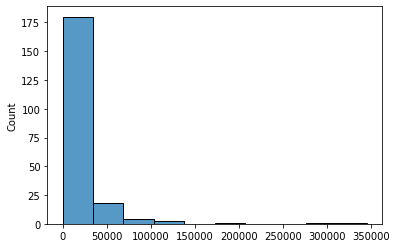

In [ ]:
absolute_error = abs(TestingData['valor real'] - TestingData['valor predito'])

sns.histplot(absolute_error, bins=10)

### Outro vendedor 574

In [ ]:
df_574 = dataframe[dataframe['codvendedor'] == 574]
df_574.head()

,numpedido,numcarga,numnota,condvenda,posicao,dtemissao,vltotal,vltabela,codcli,codvendedor,codfilial,codfilialnf,codplpag,codcob,origem,motorista,codfornecfrete,codfornecfreteredespacho,totpeso,totvolume,pedido_id,chave_nfe,perc_comissao,numpedidotv1,dtemissaonf,tstamp,obs,obs_entrega,perc_lucratividade,numpedorigem,vlfrete,dtabertura,dtfechamento,codsegmento,codtabvenda,codplpagetico,codplpaggenerico,codmotorista,fretedespacho,freteredespacho
25,8804585,227909.0,4589720.0,1,F,2021-09-27,2581.90,2581.90,28802,574,0,0,102,3,F,NaN,NaN,NaN,254.362,638,32eba715-6b04-45d2-9f9c-03f6ca3b3cad,NaN,NaN,NaN,2021-09-28 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24,8804371,227909.0,4589721.0,1,F,2021-09-27,112.52,112.52,28802,574,0,0,102,3,F,NaN,NaN,NaN,8.960,28,f97931fe-e89f-4da6-9038-81a7ca47b650,NaN,NaN,NaN,2021-09-28 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23,8804370,227905.0,4589673.0,1,F,2021-09-27,75.90,75.90,22580,574,0,0,102,3,F,GEOVANE MATEUS DE ABREU SILVA,NaN,NaN,9.330,10,0c6965a9-2f68-4b85-bcba-600a4a962036,NaN,NaN,NaN,2021-09-28 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22,8804338,227905.0,4589671.0,1,F,2021-09-27,1787.90,1787.90,22580,574,0,0,102,3,F,GEOVANE MATEUS DE ABREU SILVA,NaN,NaN,157.281,424,1a7c8925-8146-4405-ba03-b5c6dc58d19e,NaN,NaN,NaN,2021-09-28 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
58,8809757,227978.0,4591338.0,1,ET,2021-09-28,47.78,47.78,21044,574,0,0,7,3,F,GEOVANE MATEUS DE ABREU SILVA,NaN,NaN,3.880,22,2f13a176-2b2a-4103-baa9-63fdd9ffa2a5,27210903636036000154550010045913381550414510,NaN,NaN,2021-09-29 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_574.shape

(1614, 40)

In [ ]:
df = df_574.groupby(df_574['dtemissao']).sum()
df.shape

(199, 33)

In [ ]:
# Criando janela de tempo 1 dia anterior

window = -1
history = [df['vltotal'].values[i] for i in range(window)]
test = [df['vltotal'].values[i] for i in range(window, len(df['vltotal'].values))]

In [ ]:
len(test)

200

In [ ]:
test.pop(199)

1224.75

In [ ]:
len(test)

199

In [ ]:
df['test'] = test
df.head()

,numpedido,numcarga,numnota,condvenda,vltotal,vltabela,codcli,codvendedor,codfilial,codfilialnf,codplpag,codcob,codfornecfrete,codfornecfreteredespacho,totpeso,totvolume,perc_comissao,numpedidotv1,tstamp,obs,obs_entrega,perc_lucratividade,numpedorigem,vlfrete,dtabertura,dtfechamento,codsegmento,codtabvenda,codplpagetico,codplpaggenerico,codmotorista,fretedespacho,freteredespacho,test
dtemissao,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-09-27,35217664,911628.0,18358785.0,4,4558.220,4558.2200,102764,2296,0,0,408,12,0.0,0.0,429.933,1100,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1224.750
2021-09-28,52854391,1367886.0,27548447.0,6,5889.416,5889.4171,84984,3444,0,0,42,18,0.0,0.0,608.073,1323,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4558.220
2021-09-29,17626863,456138.0,9186095.0,2,11501.180,11501.1800,810,1148,0,0,191,6,0.0,0.0,341.318,1846,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5889.416
2021-09-30,211622429,5019788.0,101074392.0,24,166478.181,166479.7033,382792,13776,0,0,609,72,0.0,0.0,7901.189,32980,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11501.180
2021-10-01,17639577,456552.0,9191649.0,2,3011.986,3011.9859,28968,1148,0,0,12,6,0.0,0.0,330.650,656,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,166478.181


In [ ]:
X = df[['vltotal', 'totvolume', 'condvenda']]
y = df['test']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, shuffle=False, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((149, 3), (50, 3), (149,), (50,))

In [ ]:
pred = xgb_foward.predict(X)

In [ ]:
print(f'MAE: {metrics.mean_absolute_error(y, pred):.2f}')
print(f'MSE: {metrics.mean_squared_error(y, pred):.2f}')
print(f'RMSE: {np.sqrt(metrics.mean_squared_error(y, pred)):.2f}')
print(f'R: {metrics.r2_score(y, pred):.2f}')
MAPE = np.mean(100 * (np.abs(y-pred)/y))
acc = 100 - MAPE
print(f'MAPE: {MAPE:.2f}')
print(f'Acurácia: {acc:.2f}')
print(f'mean y_test: {y.mean():.2f}')
print(f'median y_test: {y.median():.2f}')
print(f'mean pred: {pred.mean():.2f}')
print(f'median pred: {np.median(pred):.2f}')

MAE: 24050.97
MSE: 2834782996.44
RMSE: 53242.68
R: -0.12
MAPE: 319.40
Acurácia: -219.40
mean y_test: 25274.26
median y_test: 10802.64
mean pred: 17170.63
median pred: 9708.06


In [ ]:
Test_Data=X
 
TestingData=pd.DataFrame(data=df)
TestingData['valor real']=y
TestingData['valor predito']=pred
TestingData.head()

,numpedido,numcarga,numnota,condvenda,vltotal,vltabela,codcli,codvendedor,codfilial,codfilialnf,codplpag,codcob,codfornecfrete,codfornecfreteredespacho,totpeso,totvolume,perc_comissao,numpedidotv1,tstamp,obs,obs_entrega,perc_lucratividade,numpedorigem,vlfrete,dtabertura,dtfechamento,codsegmento,codtabvenda,codplpagetico,codplpaggenerico,codmotorista,fretedespacho,freteredespacho,test,valor real,valor predito
dtemissao,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-09-27,35217664,911628.0,18358785.0,4,4558.220,4558.2200,102764,2296,0,0,408,12,0.0,0.0,429.933,1100,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1224.750,1224.750,9708.063477
2021-09-28,52854391,1367886.0,27548447.0,6,5889.416,5889.4171,84984,3444,0,0,42,18,0.0,0.0,608.073,1323,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4558.220,4558.220,9708.063477
2021-09-29,17626863,456138.0,9186095.0,2,11501.180,11501.1800,810,1148,0,0,191,6,0.0,0.0,341.318,1846,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5889.416,5889.416,9708.063477
2021-09-30,211622429,5019788.0,101074392.0,24,166478.181,166479.7033,382792,13776,0,0,609,72,0.0,0.0,7901.189,32980,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11501.180,11501.180,39937.007812
2021-10-01,17639577,456552.0,9191649.0,2,3011.986,3011.9859,28968,1148,0,0,12,6,0.0,0.0,330.650,656,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,166478.181,166478.181,9708.063477


In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(y=TestingData['valor real'],
                    mode='lines',
                    name='real'))
fig.add_trace(go.Scatter(y=TestingData['valor predito'],
                    mode='lines',
                    name='predito'))

fig.show()

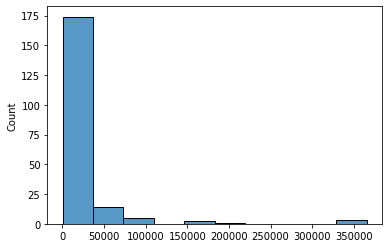

In [ ]:
absolute_error = abs(TestingData['valor real'] - TestingData['valor predito'])

sns.histplot(absolute_error, bins=10)

### Testando todos os vendedores

In [ ]:
sales = dataframe['codvendedor'].values

for sale in set(sales):
    df = dataframe[dataframe['codvendedor'] == sale]
    df = df.groupby(df['dtemissao']).sum()

    window = -1
    history = [df['vltotal'].values[i] for i in range(window)]
    test = [df['vltotal'].values[i] for i in range(window, len(df['vltotal'].values))]

    test.pop(len(test)-1)
    df['test'] = test

    y = df['test']
    X = df[['vltotal', 'totvolume', 'condvenda']]
    if len(y) < 10:
        continue
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, shuffle=False, random_state=1)
    X_train= X_train.values.reshape(-1, 1)
    X_test = X_test.values.reshape(-1, 1)

    predict = xgb_foward.predict(X)

    print(f'######{sale}######')
    print(f'MAE: {metrics.mean_absolute_error(y, predict):.2f}')
    print(f'MSE: {metrics.mean_squared_error(y, predict):.2f}')
    print(f'RMSE: {np.sqrt(metrics.mean_squared_error(y, predict)):.2f}')
    print(f'R: {metrics.r2_score(y, predict):.2f}')
    MAPE = np.mean(100 * (np.abs(y.values-predict)/y.values))
    acc = 100 - MAPE
    print(f'MAPE: {MAPE:.2f}')
    print(f'Acurácia: {acc:.2f}')
    print(f'mean y: {y.mean():.2f}')
    print(f'median y: {y.median():.2f}')
    print(f'mean pred: {predict.mean():.2f}')
    print(f'median pred: {np.median(predict):.2f}')

######1160######
MAE: 21517.40
MSE: 1892282147.27
RMSE: 43500.37
R: -0.08
MAPE: 579.91
Acurácia: -479.91
mean y: 24138.34
median y: 12029.01
mean pred: 16518.37
median pred: 9708.06
######2342######
MAE: 30435.85
MSE: 2007874585.53
RMSE: 44809.31
R: -20.25
MAPE: 1654.96
Acurácia: -1554.96
mean y: 9168.10
median y: 5105.84
mean pred: 36694.31
median pred: 19762.57
######2220######
MAE: 26473.18
MSE: 1256341059.78
RMSE: 35444.90
R: -2.60
MAPE: 1899.76
Acurácia: -1799.76
mean y: 8651.08
median y: 1975.10
mean pred: 27193.10
median pred: 19762.57
######2348######
MAE: 26241.50
MSE: 2175476288.99
RMSE: 46642.00
R: 0.31
MAPE: inf
Acurácia: -inf
mean y: 39404.53
median y: 15986.29
mean pred: 24546.64
median pred: 20926.52
######1839######
MAE: 21994.76
MSE: 1136310449.88
RMSE: 33709.20
R: -6.19
MAPE: 584.38
Acurácia: -484.38
mean y: 12241.89
median y: 8585.21
mean pred: 27131.43
median pred: 19762.57
######1455######
MAE: 20728.46
MSE: 918121613.11
RMSE: 30300.52
R: -0.33
MAPE: 342.57
Acuráci